<a href="https://colab.research.google.com/github/LeoJAndrade/Machine-Learning-2-Fatec/blob/main/Aula_05_KMeans_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [45]:
iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

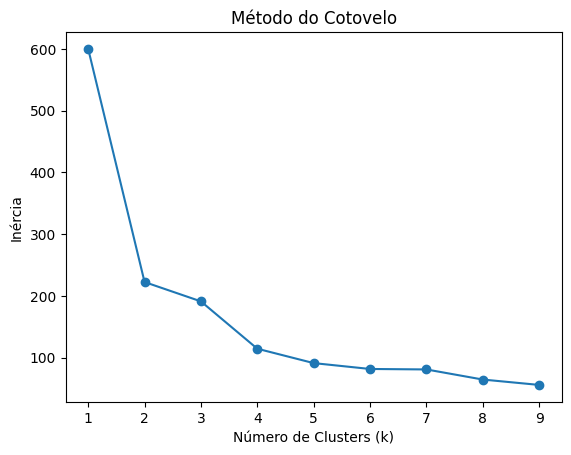

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

inertias = []
for k in range(1, 10):
  kmeans_test = KMeans(n_clusters=k, random_state=42)
  kmeans_test.fit(X_scaled)
  inertias.append(kmeans_test.inertia_)

# Plotando gráfico do cotovelo
plt.plot(range(1,10), inertias, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.show()

In [9]:
def calculate_wcss(data):
  """
  Calcula a soma dos quadrados intra_clusters
  """
  wcss = []
  for n in range(1, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X=data)
    wcss.append(kmeans.inertia_)

  return wcss

In [30]:
def optimal_number_of_clusters(wcss):
  """
  Recebe uma lista contendo a soma dos quadrados para cada quantidade de clusters
  e retorna a quantidade ótima de clusters.
  """

  x1, y1 = 1, wcss[0]
  x2, y2 = 9, wcss[len(wcss) - 1]

  distances = []
  for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)

  return distances.index(max(distances)) + 2

In [37]:
sum_of_squares = calculate_wcss(X_scale)

# Encontra o número ótimo de clusters
n = optimal_number_of_clusters(sum_of_squares)

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit(X_scaled)

print(f"Número ótimo de clusters: {n}")

Número ótimo de clusters: 4


### Aplicando Redução de Dimensionalidade PCA

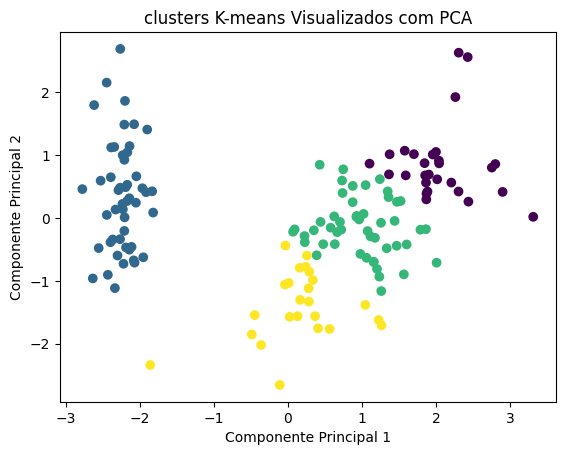

In [41]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters.labels_, cmap='viridis')
plt.title('clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Aplicando Redução de Dimensionalidade com t-SNE

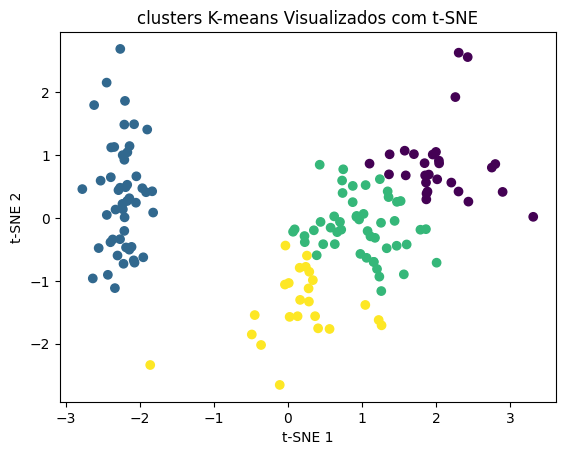

In [42]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters.labels_, cmap='viridis')
plt.title('clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [49]:
clusters_predict = kmeans.fit_predict(X_scaled)
df['clusters'] = clusters_predict

cluster_means = df.groupby(['clusters']).mean()
print(cluster_means)

          sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
clusters                                                                          
0                  5.016327          3.451020           1.465306          0.244898
1                  6.097778          2.875556           4.726667          1.584444
2                  6.923529          3.132353           5.735294          2.091176
3                  5.495455          2.436364           3.827273          1.159091


### **Análise**
| Cluster | Descrição |
| ------- | --------- |
| 0 | Sépalas mais largas e Pétalas com menor comprimento e largura. |
| 1 | Pétalas e Sépalas com comprimento e largura mais longo. |
| 2 | Sépalas e Pétalas com comprimento mais longo e Pétalas com maior largura.|
| 3 | Sépalas e Pétalas com comprimento e largura médio. |